# Training Deep Neural Networks

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Problems in training deep neural networks

* Vanishing/Exploding Gradients Problem
* Not enough training data
* Too slow
* Overfitting

## Vanishing/Exploding Gradients Problem

### How does backpropagation algorithm work?

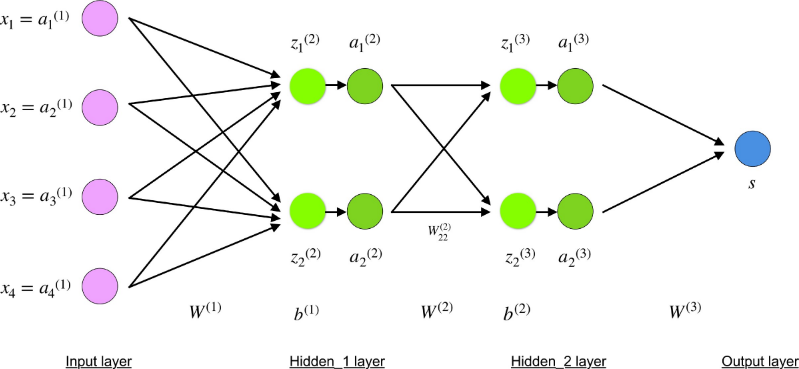

* going from the output layer to the input layer, propagating the error gradient along the way

* Error or cost function. This can be as simple as MSE (mean squared error) or more complex like cross-entropy.

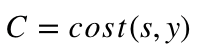

* Based on C’s value, the model “knows” how much to adjust its parameters in order to get closer to the expected output

* backpropagation aims to minimize the cost function by adjusting network’s weights and biases



* compute the gradient of the cost function with regard to each parameter in the network
* Gradient of a function $C(x_1, x_2, …, x_m)$ in point $x$ is a vector of the partial derivatives of $C$ in $x$

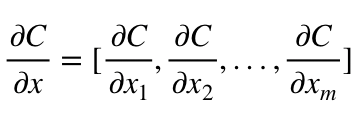

* The gradient shows how much the parameter x needs to change (in positive or negative direction) to minimize C.
* Reference
    * [Backpropagation Example With Numbers Step by Step](https://www.anotsorandomwalk.com/backpropagation-example-with-numbers-step-by-step/)
    * [Understanding Backpropagation Algorithm](https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd)

* Compute those gradients happens using a technique called chain rule
* Here is an example of calculating the gradient of C with respect to a single weight

<div>
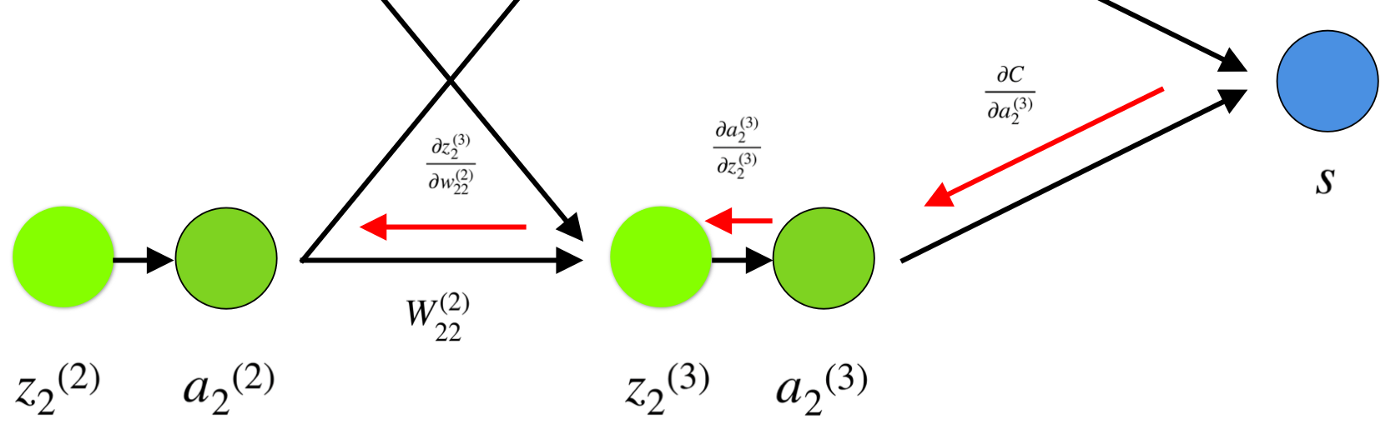
</div>

* Weight $w_{22}^{(2)}$ connects $a_2^{(2)}$ and $z_2^{(2)}$, so computing the gradient requires applying the chain rule through $z_2^{(3)}$ and $a_2^{(3)}$:

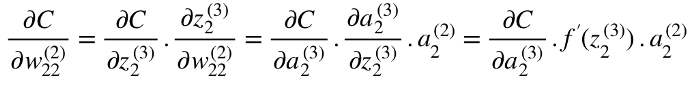

### What is Vanishing Gradients?

* Vanishing Gradient occurs when the derivative or slope will get smaller and smaller as we go backward with every layer during backpropagation.

* When weights update is very small or exponential small, the training time takes too much longer, and in the worst case, this may completely stop the neural network training.

***The root of vanishing gradients***

* A vanishing Gradient problem occurs with the sigmoid and tanh activation function because the derivatives of the sigmoid and tanh activation functions are between 0 to 0.25 and 0–1. 

* Therefore, the updated weight values are small, and the new weight values are very similar to the old weight values. This leads to Vanishing Gradient problem. 

* A solution: use the ReLU activation function because the gradient is 0 for negatives and zero input, and 1 for positive input.


### What is Exploding Gradients?

* Exploding gradient occurs when the derivatives or slope will get larger and larger as we go backward with every layer during backpropagation.

***The root of exploding gradients***

* This problem happens because of weights, not because of the activation function. 
* Due to high weight values, the derivatives will also higher so that the new weight varies a lot to the older weight, and the gradient will never converge. 
* it may result in oscillating around minima and never come to a global minima point.

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

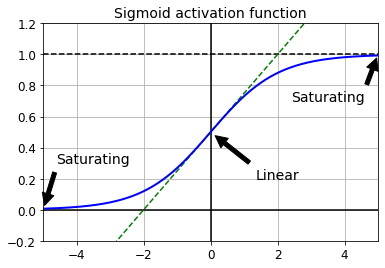

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

***Activation functions and derivatives***

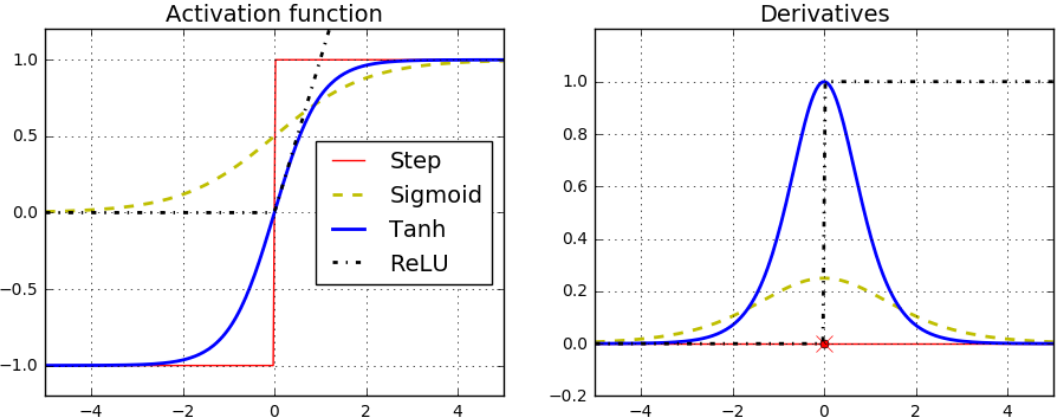

### The problems with random initialization

***10 layers network. Activation function is tanh. On each layer, the weights are normal distributed with mean 0 and std 0.01***

* In the later layers, almost all output values are close to zero, i.e., the gradient becomes very small close to zero. 

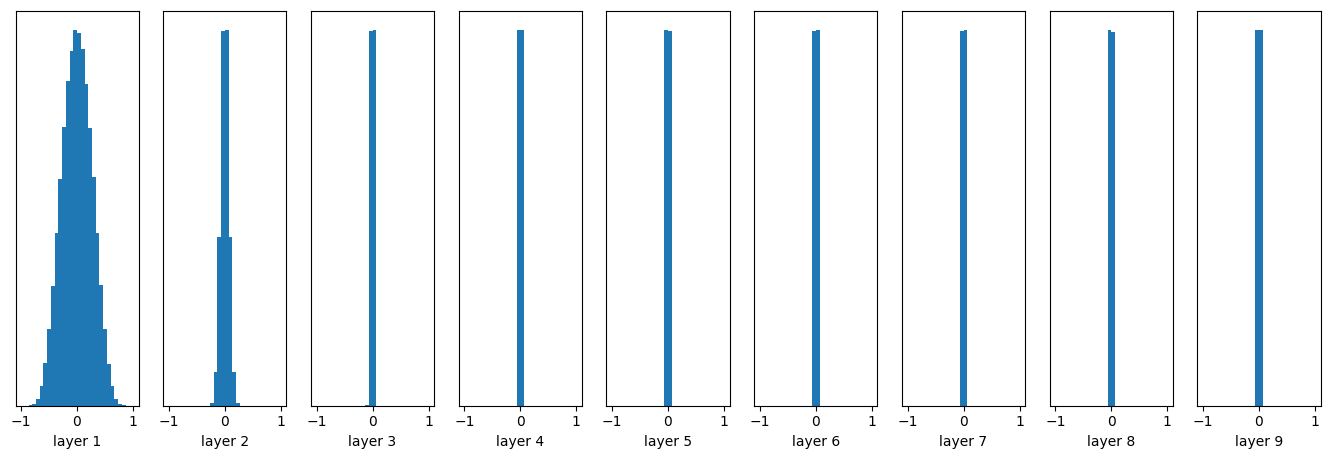

***10 layers network. Activation function is tanh. On each layer, the weights are normal distributed with mean 0 and std 1***

* Most of the output values are very close to -1 or 1. The gradiet is also very small close to zero. 

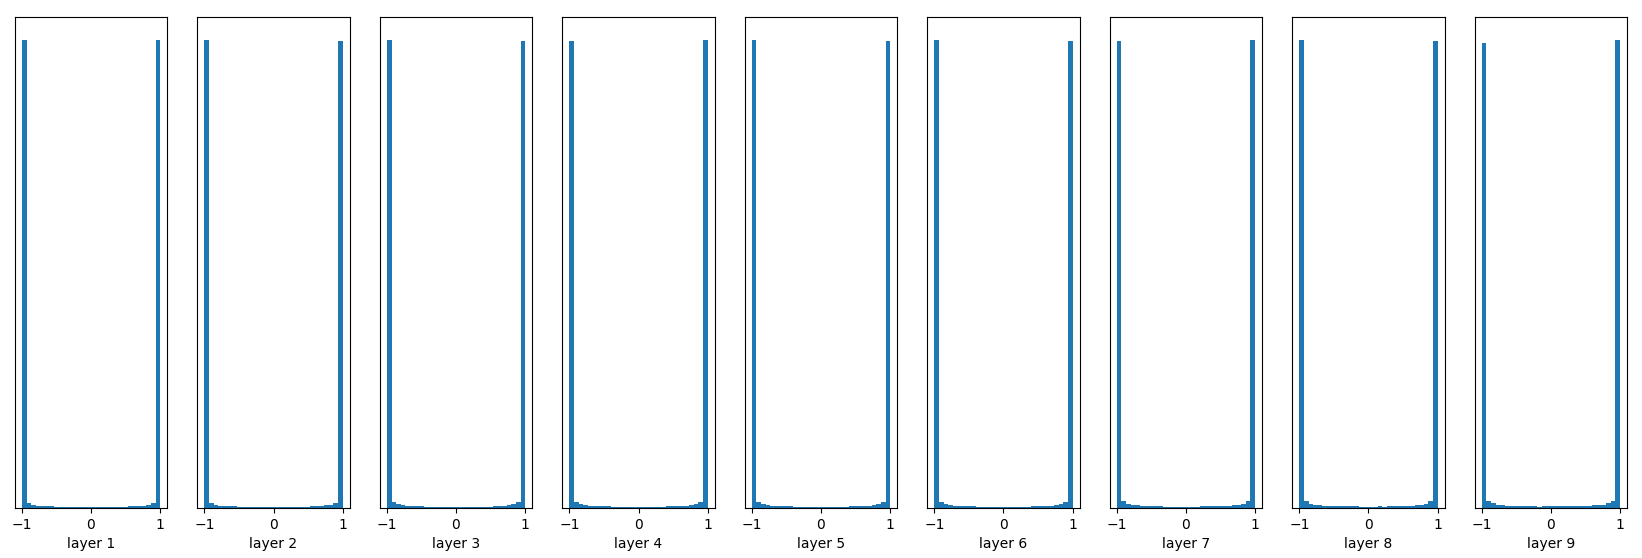


### How to tackle the unstable gradients problem?

***Some thoughts:*** 

* we can't use the same normal distribution on each layer. 
* we need the signal to flow properly in both
directions: in the forward direction when making predictions, and in the reverse
direction when backpropagating gradients.
* We don’t want the signal to die out, nor
do we want it to explode and saturate

***The idea***

* It is like a chain of amplifiers: they all need to be set properly in order for your voice to come
out loud and clear at the end of the chain.

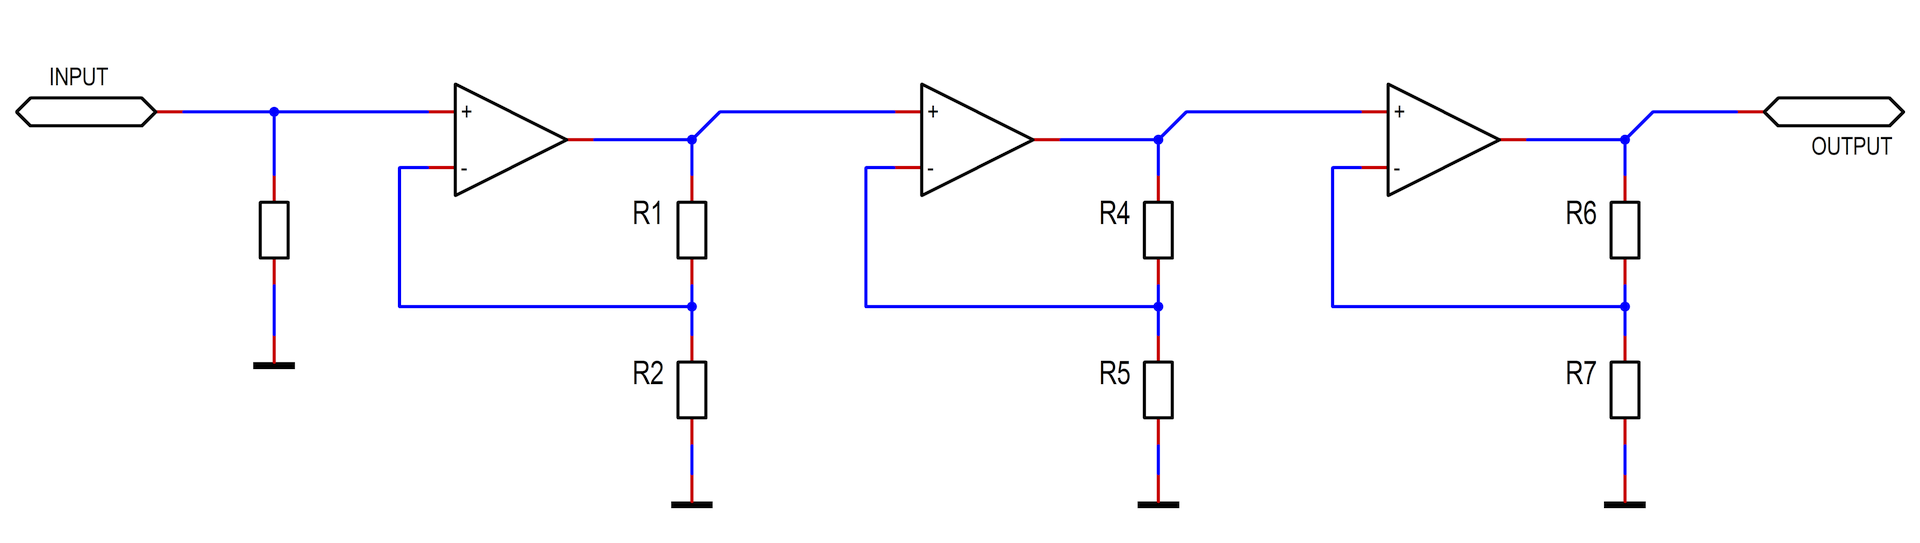

***So the solutions will be***

* we need the variance of the outputs of each layer to be equal to the variance
of its inputs
* we need the gradients to have equal variance before and after
flowing through a layer in the reverse direction 
* It is actually not possible to guarantee both
unless the layer has an equal number of inputs and neurons (*these numbers are called
the fan-in and fan-out of the layer*)
* where $$fan_{avg} = (fan_{in} + fan_{out})/2$$

### Xavier initialization or Glorot initialization

* speed up training considerably
* one of the tricks that led to the success of deep learning

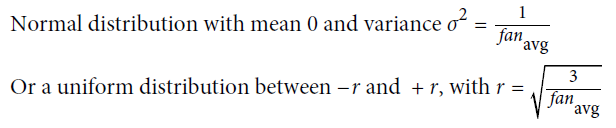

* Xavier initialization works well for tanh

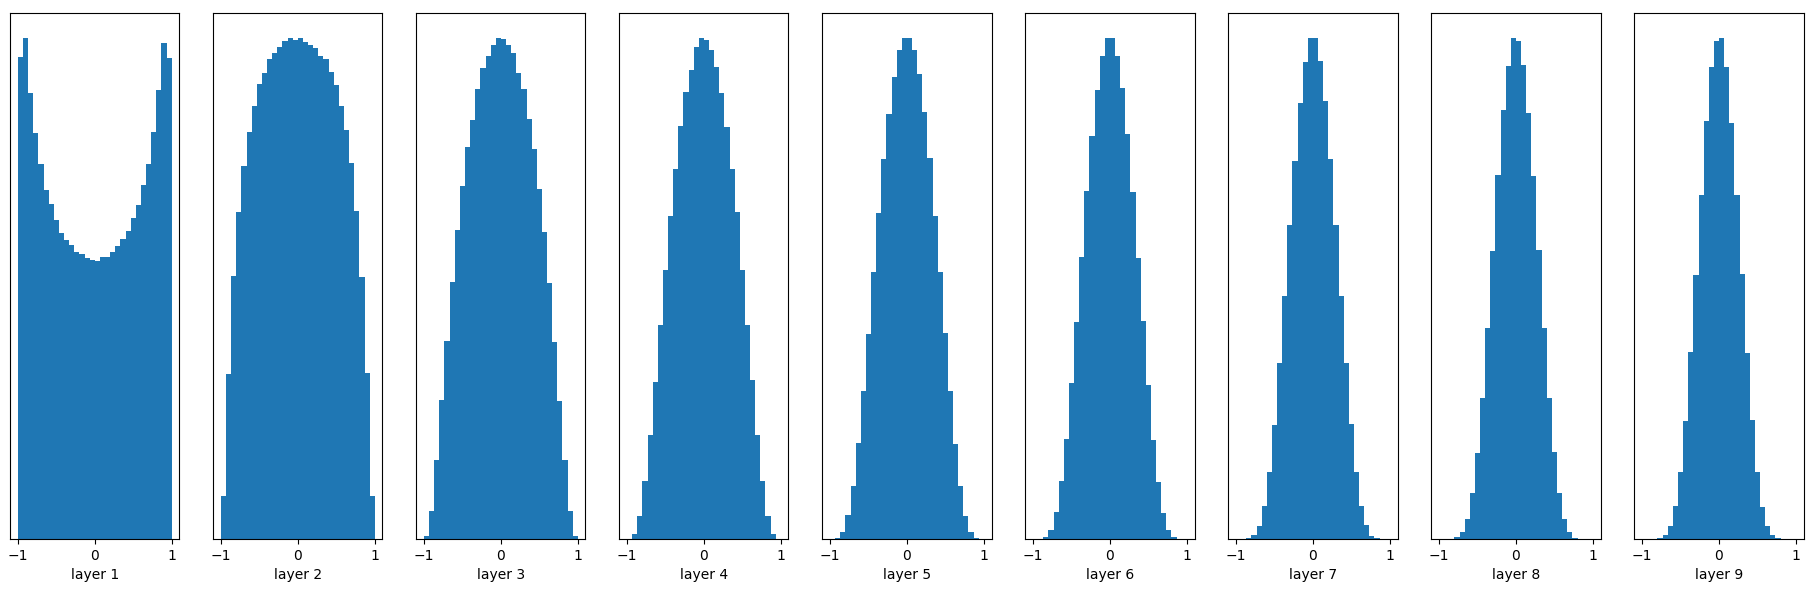

* How about Xavier initialization on ReLU? In the later layers the outputs still converge to zero.

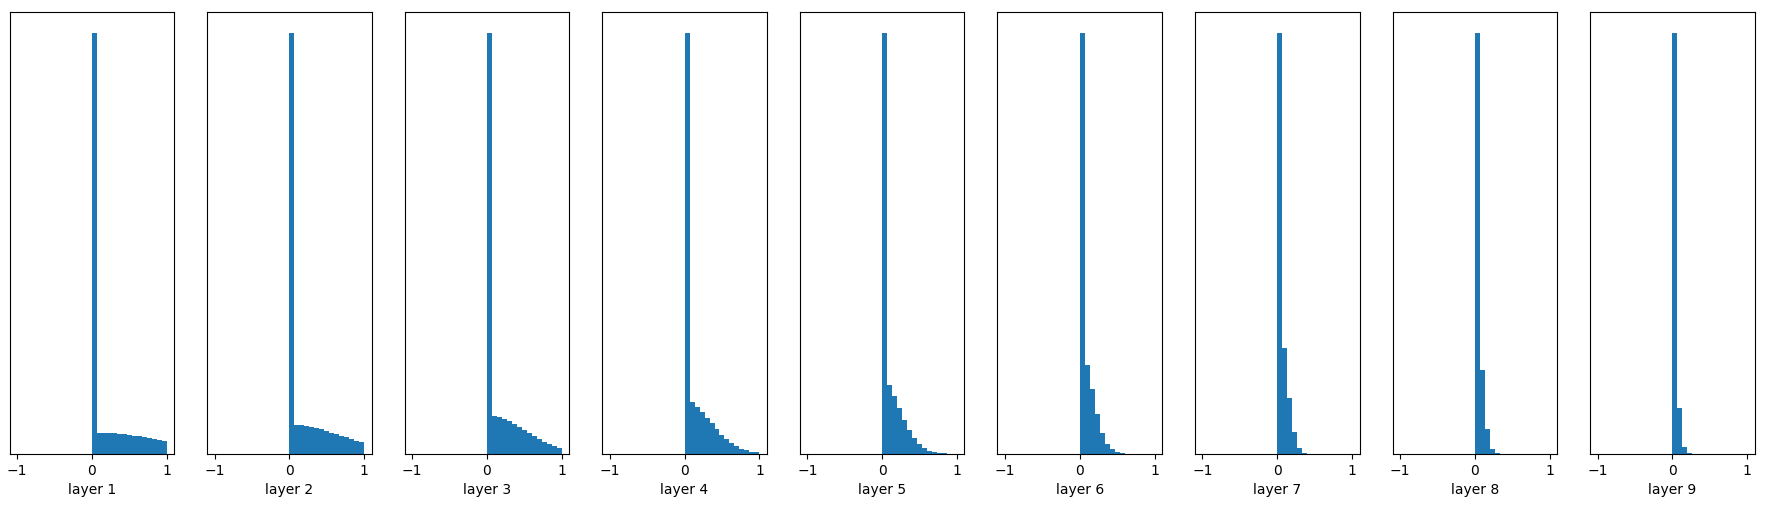

### He initialization and LeCun initialization

* In ReLU network, we use different the variance.
* the ReLU is half rectified (from bottom). f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero

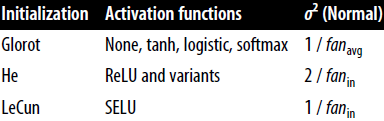

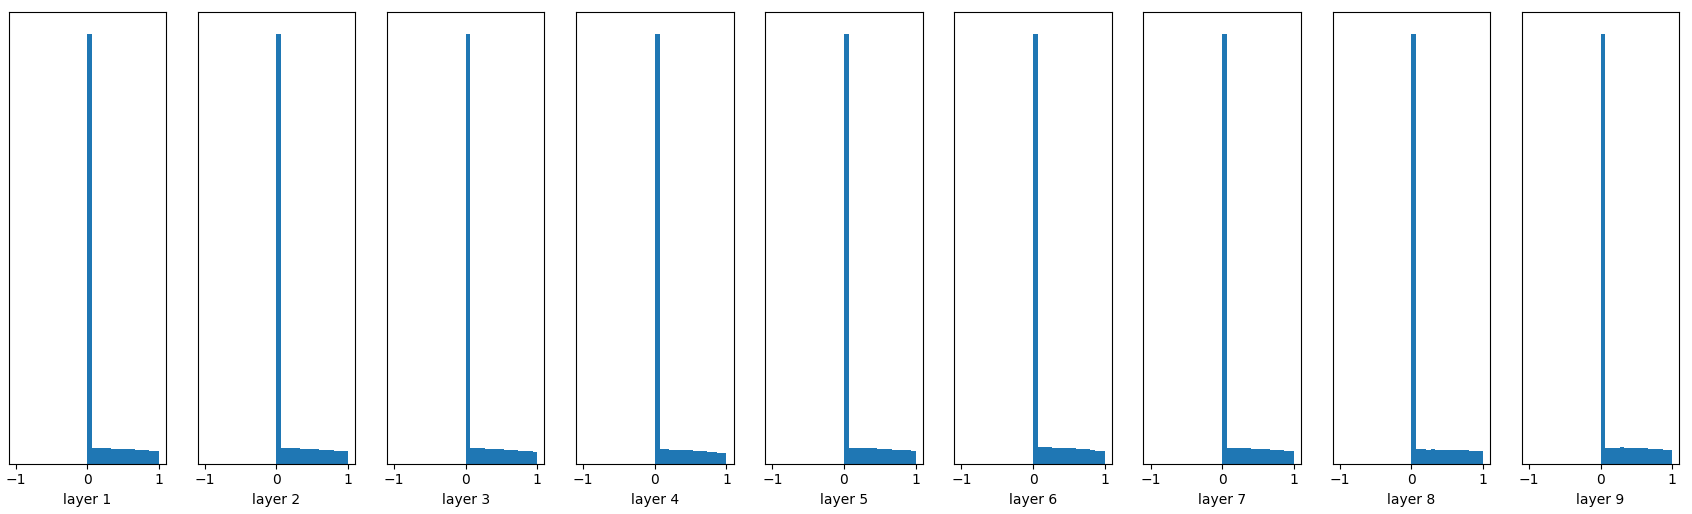

## Xavier and He Initialization and many others

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

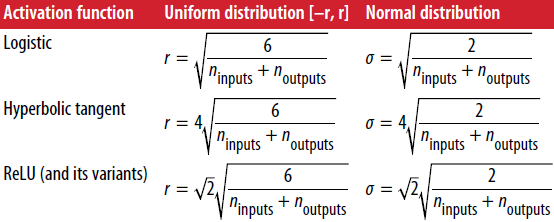

## Nonsaturating Activation Functions

* the problems with unstable gradients were in part due to a poor choice of activation function
* sigmoid activation functions are not the best choice in deep neural networks
* in particular, ReLU does not saturate for positive values


### The issues of ReLU

* the dying ReLUs: some neurons die. They stop outputting anything other than 0.
* A neuron dies when its weights get tweaked in such a way that the weighted sum of its inputs  are negative for all instances in the training set.
* In some cases, half of the network’s neurons are dead, especially if you used a large learning rate
* Gradient Descent does not affect it anymore because the gradient of the ReLU function is zero when its input is negative

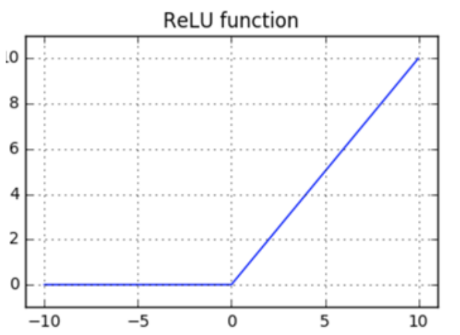

### The solution: Leaky ReLU

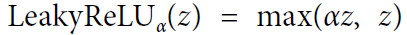

* $α$ is the slope of the function for z < 0 and is typically set to 0.01. 
* This small slope ensures that leaky ReLUs never die
* they have a chance to eventually wake up

***the leaky variants always outperformed the strict ReLU activation function***

In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

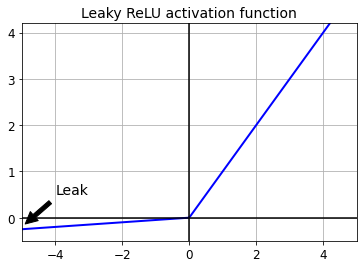

In [8]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

#### Other variations

* ***randomized leaky ReLU (RReLU)*** -- where $α$ is picked randomly in a given range during
training and is fixed to an average value during testing
    * RReLU performed fairly well and seemed to act as a regularizer (reducing the risk of overfitting the training
set)


* ***parametric leaky ReLU (PReLU)***, where $α$ is authorized to be learned during training
    * PReLU was reported to strongly outperform ReLU on large image datasets, but on smaller datasets it runs the risk of overfitting the training set.
    
    
* ***exponential linear unit (ELU)***, outperformed all the ReLU variants

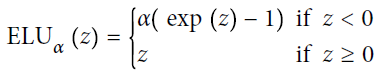



* ***Scaled ELU (SELU)***, is a scaled variant of the ELU activation function


* [Activation Functions Explained - GELU, SELU, ELU, ReLU and more](https://mlfromscratch.com/activation-functions-explained/#/)

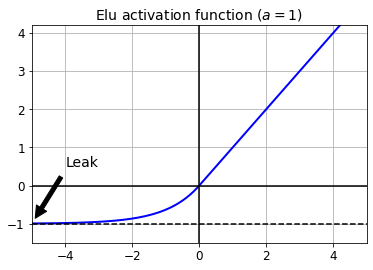

In [9]:
def elu(z, alpha=0.01):
    return np.where(z<0,alpha*(np.exp(z)-1), z)

plt.plot(z, elu(z,1), "b-", linewidth=2)  # set alpha to 1
plt.plot( [-5, 5], [0,0], 'k-' ) # x-axis
plt.plot( [-5, 5], [-1,-1], 'k--')
plt.plot( [0,0], [-1.5, 4.2], 'k-' ) # y-axis
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5),
             xy=(-5,-1), #since min(elu(z,1))==-0.9932620530009145
             arrowprops=props,
             fontsize=14, ha='center'
            )
plt.title('Elu activation function $(a=1)$', fontsize=14)
plt.axis([-5,5, -1.5,4.2])

plt.show()

***notes***

* The hyperparameter $α$ defines the value that the ELU function approaches when z is a large negative number. 
* It is usually set to 1, but you can tweak it like any other hyperparameter.
* It has a nonzero gradient for z < 0, which avoids the dead neurons problem.
* If $α$ is equal to 1 then the function is smooth everywhere, including around z = 0



* Exponential Linear Unit with a=1 and its derivative
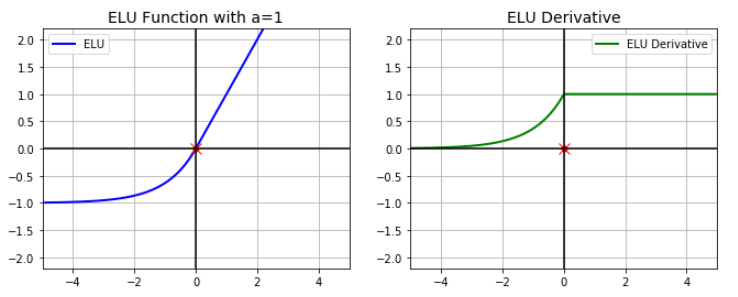

***Main drawback***

* slower to compute than the ReLU function and its variants

* Implementing ELU in TensorFlow is trivial, just specify the activation function when building each layer:

In [10]:
keras.layers.Dense(10, activation="elu")

In [11]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [12]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

### Train a neural network on Fashion MNIST using default $α=0.3$ in $LeakyReLU_α(z) = max(αz, z)$

* scale the pixel intensities down to the 0–1 range by dividing them by 255.0

In [13]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

* Flatten layer whose role is to convert each input image into a 1D array
* To use the leaky ReLU activation function, create a LeakyReLU layer and add it to your model just after the layer you want to apply it to
* Add a Dense output layer with 10 neurons (one per class(0~9))
* Use the softmax activation function (because the classes are exclusive)

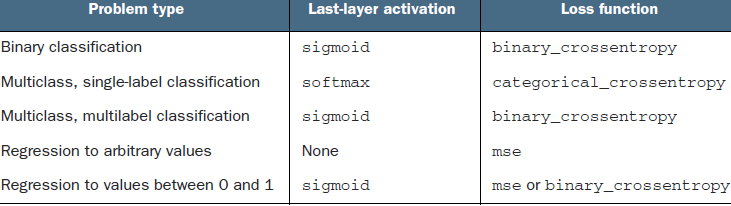

In [14]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[28,28]), #28*28=784
    keras.layers.Dense(300, kernel_initializer='he_normal'), #variance=2/fan_in
    
    keras.layers.LeakyReLU(), #LeakyReLUα(z) = max(αz, z) #keras.layers.LeakyReLU(alpha=0.3, **kwargs)
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(), # alpha is the slope of the function for z < 0
    keras.layers.Dense(10, activation='softmax')
])

* In this example, we only care about accuracy score

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5832 - accuracy: 0.8075 - val_loss: 0.5582 - val_accuracy: 0.8202
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5338 - accuracy: 0.8225 - val_loss: 0.5157 - val_accuracy

In [17]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

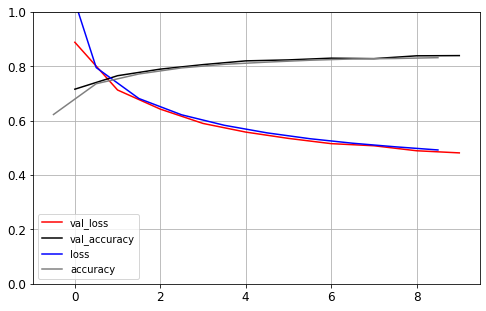

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

colors=[#"blue", "gray", #  loss      accuracy
        "red", "black"] #   val_loss  val_accuracy
                               #df[ ["val_loss","val_accuracy"] ].plot(figsize=(8,5), color=colors)
pd.DataFrame( history.history )[["val_loss","val_accuracy"]].plot(figsize=(8,5), color=colors)

# the validation error is computed at the end of each epoch, while the training error is
# computed using a running mean during each epoch. So the training curve should be shifted by
# half an epoch to the left.
#shift(-0.5)
         #1D array                #list
plt.plot(np.arange(-0.5,9,1), history.history["loss"], c="blue", label="loss")    #must be put after previous code for plotting Dataframe
plt.plot(np.arange(-0.5,9,1), history.history["accuracy"], c="gray", label="accuracy")#must be put after previous code for plotting Dataframe
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

***notes***

* both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. 
* the validation curves are close to the training curves, which means that there is not too much overfitting. 
* The validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch, so the training curve should be shifted by half an epoch to the left. 

In [19]:
X_new = X_test[:3]

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [20]:
model.evaluate( X_test, y_test )

313/313 [==============================] - 1s 3ms/step - loss: 0.5155 - accuracy: 0.8241


[0.5155007839202881, 0.8241000175476074]

In [21]:
history.history['val_accuracy']

[0.7160000205039978,
 0.7656000256538391,
 0.7897999882698059,
 0.8064000010490417,
 0.8202000260353088,
 0.8238000273704529,
 0.8302000164985657,
 0.8284000158309937,
 0.8388000130653381,
 0.8396000266075134]

### Try PReLU

* To use the PReLU activation function, create a PReLU layer and add it to your model just after the layer you want to apply it to

In [22]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [24]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7184
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6966 - accuracy: 0.7693 - val_loss: 0.6565 - val_accuracy: 0.7880
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6004 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5656 - val_accuracy: 0.8184
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5618 - accuracy: 0.8136 - val_loss: 0.5406 - val_accuracy: 0.8240
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5391 - accuracy: 0.8206 - val_loss: 0.5197 - val_accuracy:

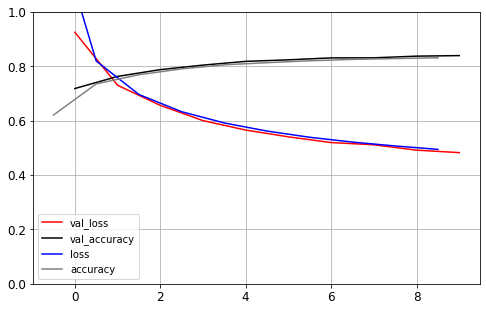

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
 
colors=[#"blue", "gray", #  loss      accuracy
        "red", "black"] #   val_loss  val_accuracy
                               #df[ ["val_loss","val_accuracy"] ].plot(figsize=(8,5), color=colors)
pd.DataFrame( history.history )[["val_loss","val_accuracy"]].plot(figsize=(8,5), color=colors)

# the validation error is computed at the end of each epoch, while the training error is
# computed using a running mean during each epoch. So the training curve should be shifted by
# half an epoch to the left.
#shift(-0.5)
         #1D array                #list
plt.plot(np.arange(-0.5,9,1), history.history["loss"], c="blue", label="loss")    #must be put after previous code for plotting Dataframe
plt.plot(np.arange(-0.5,9,1), history.history["accuracy"], c="gray", label="accuracy")#must be put after previous code for plotting Dataframe
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [26]:
model.evaluate( X_test, y_test )

313/313 [==============================] - 1s 3ms/step - loss: 0.5144 - accuracy: 0.8242


[0.5144070982933044, 0.8241999745368958]

In [27]:
history.history['val_accuracy'][-1]

0.8396000266075134

In [28]:
X_new = X_test[:3]

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

### SELU

This activation function was proposed in this [great paper](https://arxiv.org/pdf/1706.02515.pdf) by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017. During training, a neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. As a result, this activation function outperforms the other activation functions very significantly for such neural nets, so you should really try it out. Unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ<sub>1</sub> or ℓ<sub>2</sub> regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

In [29]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [30]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

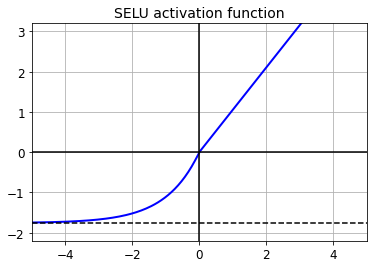

In [31]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

By default, the SELU hyperparameters (`scale` and `alpha`) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

In [32]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


* Using SELU is easy:

In [33]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

* Let's create a neural net for Fashion MNIST with 100 hidden layers, using the SELU activation function:

In [34]:
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

* Train it. Do not forget to scale the inputs to mean 0 and standard deviation 1:

In [37]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [38]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 49s 26ms/step - loss: 1.2545 - accuracy: 0.5136 - val_loss: 0.9471 - val_accuracy: 0.6266
Epoch 2/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.9041 - accuracy: 0.6327 - val_loss: 0.7068 - val_accuracy: 0.7422
Epoch 3/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.7010 - accuracy: 0.7423 - val_loss: 0.6865 - val_accuracy: 0.7396
Epoch 4/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.5930 - accuracy: 0.7906 - val_loss: 1.5429 - val_accuracy: 0.5476
Epoch 5/5
1719/1719 [==============================] - 48s 28ms/step - loss: 0.5457 - accuracy: 0.8074 - val_loss: 0.4876 - val_accuracy: 0.8328


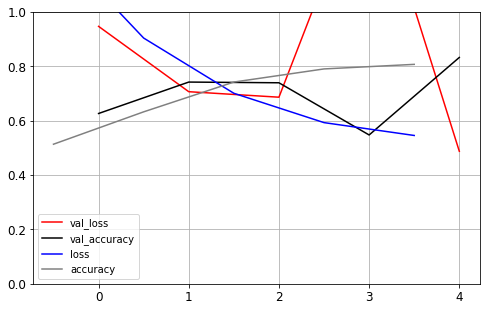

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

colors=[#"blue", "gray", #  loss      accuracy
        "red", "black"] #   val_loss  val_accuracy
                               #df[ ["val_loss","val_accuracy"] ].plot(figsize=(8,5), color=colors)
pd.DataFrame( history.history )[["val_loss","val_accuracy"]].plot(figsize=(8,5), color=colors)

# the validation error is computed at the end of each epoch, while the training error is
# computed using a running mean during each epoch. So the training curve should be shifted by
# half an epoch to the left.
#shift(-0.5)
         #1D array                #list
plt.plot(np.arange(-0.5,4,1), history.history["loss"], c="blue", label="loss")    #must be put after previous code for plotting Dataframe
plt.plot(np.arange(-0.5,4,1), history.history["accuracy"], c="gray", label="accuracy")#must be put after previous code for plotting Dataframe
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [40]:
model.evaluate( X_test_scaled, y_test )

313/313 [==============================] - 4s 14ms/step - loss: 0.5203 - accuracy: 0.8185


[0.5202608108520508, 0.8184999823570251]

In [41]:
history.history['val_accuracy'][-1]

0.8327999711036682

In [42]:
X_new = X_test[:3]

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([5, 2, 1], dtype=int64)

In [43]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

* Now look at what happens if we try to use the ReLU activation function instead:

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [47]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 45s 23ms/step - loss: 1.8163 - accuracy: 0.2647 - val_loss: 1.4277 - val_accuracy: 0.3554
Epoch 2/5
1719/1719 [==============================] - 40s 23ms/step - loss: 1.2786 - accuracy: 0.4501 - val_loss: 0.9486 - val_accuracy: 0.5984
Epoch 3/5
1719/1719 [==============================] - 39s 22ms/step - loss: 0.9572 - accuracy: 0.6038 - val_loss: 0.9162 - val_accuracy: 0.6188
Epoch 4/5
1719/1719 [==============================] - 40s 23ms/step - loss: 0.8658 - accuracy: 0.6669 - val_loss: 0.8104 - val_accuracy: 0.7060
Epoch 5/5
1719/1719 [==============================] - 43s 25ms/step - loss: 0.7951 - accuracy: 0.7000 - val_loss: 0.7301 - val_accuracy: 0.7184


In [48]:
model.evaluate( X_test_scaled, y_test )

313/313 [==============================] - 3s 10ms/step - loss: 0.7503 - accuracy: 0.7102


[0.7502891421318054, 0.7102000117301941]

In [49]:
history.history['val_accuracy'][-1]

0.7184000015258789

In [50]:
X_new = X_test[:3]

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([3, 0, 3], dtype=int64)

In [51]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

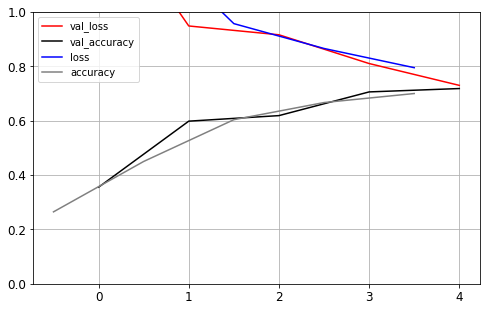

In [52]:
colors=[#"blue", "gray", #  loss      accuracy
        "red", "black"] #   val_loss  val_accuracy
                               #df[ ["val_loss","val_accuracy"] ].plot(figsize=(8,5), color=colors)
pd.DataFrame( history.history )[["val_loss","val_accuracy"]].plot(figsize=(8,5), color=colors)

# the validation error is computed at the end of each epoch, while the training error is
# computed using a running mean during each epoch. So the training curve should be shifted by
# half an epoch to the left.
#shift(-0.5)
         #1D array                #list
plt.plot(np.arange(-0.5,4,1), history.history["loss"], c="blue", label="loss")    #must be put after previous code for plotting Dataframe
plt.plot(np.arange(-0.5,4,1), history.history["accuracy"], c="gray", label="accuracy")#must be put after previous code for plotting Dataframe
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

Not great at all, we suffered from the vanishing/exploding gradients problem.

# Batch Normalization

* Although using He initialization along with ELU (or any variant of ReLU) can significantly reduce the danger of the vanishing/exploding gradients problems at the beginning of training, it doesn’t guarantee that they won’t come back during training

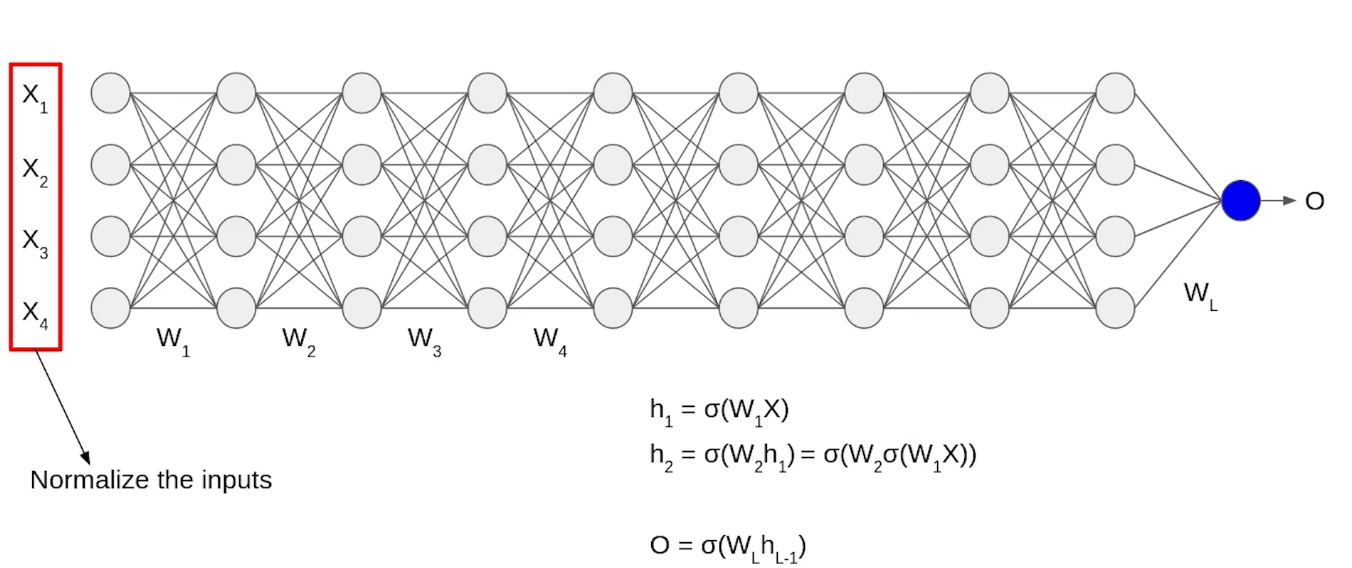

* Input X was normalized with time, but the output will no longer be on the same scale. 
* As the data go through multiple layers of the neural network and L activation functions are applied, it leads to an internal co-variate shift in the data.

***The idea to solve the problem***

* Need to normalize the outputs of each hidden layer to make every layer see the normalized input 

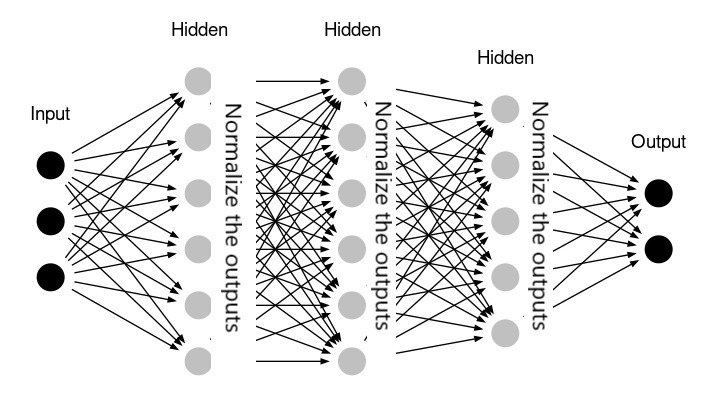

***Batch Normalization (BN) solves these problems***

* Add an operation in the model just before or after the activation function of each hidden layer. 

* This operation simply zero-centers and normalizes each input, then scales and shifts the result using two new parameter vectors per layer: one for scaling, the other for shifting. 

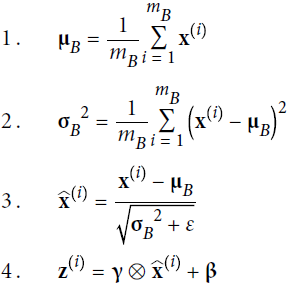

where

 is the vector of input means, evaluated over the whole mini-batch B (it contains one mean per input).

 is the vector of input standard deviations, also evaluated over the whole minibatch B(it contains one standard deviation per input).

 is the number of instances in the mini-batch.

 is the vector of zero-centered and normalized inputs for instance i

$γ$ is the output scale parameter vector for the layer (it contains one scale parameter per input).

$β$ is the output shift (offset) parameter vector for the layer (it contains one offset parameter per input). Each input is offset by its corresponding shift parameter.

 is the output of the BN(Batch Normalization) operation. It is a rescaled and shifted version of the inputs.

***So during training, BN standardizes its inputs, then rescales and offsets them***

In [53]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_212 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_213 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [55]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [56]:
#bn1.updates #deprecated

In [57]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [58]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.8750 - accuracy: 0.7124 - val_loss: 0.5525 - val_accuracy: 0.8230
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5754 - accuracy: 0.8030 - val_loss: 0.4725 - val_accuracy: 0.8472
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5190 - accuracy: 0.8204 - val_loss: 0.4375 - val_accuracy: 0.8546
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4827 - accuracy: 0.8326 - val_loss: 0.4153 - val_accuracy: 0.8604
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4565 - accuracy: 0.8407 - val_loss: 0.3998 - val_accuracy: 0.8636
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4398 - accuracy: 0.8474 - val_loss: 0.3868 - val_accuracy: 0.8698
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4242 - accuracy: 0.8515 - val_loss: 0.3764 - val_ac

Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a `BatchNormalization` layer does not need to have bias terms, since the `BatchNormalization` layer some as well, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers:

In [59]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [60]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [61]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 1.0317 - accuracy: 0.6756 - val_loss: 0.6767 - val_accuracy: 0.7810
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6790 - accuracy: 0.7792 - val_loss: 0.5566 - val_accuracy: 0.8180
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5960 - accuracy: 0.8037 - val_loss: 0.5007 - val_accuracy: 0.8362
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5447 - accuracy: 0.8192 - val_loss: 0.4666 - val_accuracy: 0.8450
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5109 - accuracy: 0.8280 - val_loss: 0.4434 - val_accuracy: 0.8532
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4898 - accuracy: 0.8337 - val_loss: 0.4262 - val_accuracy: 0.8544
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4712 - accuracy: 0.8395 - val_loss: 0.4130 - val_ac

## Gradient Clipping

* clip the gradients during backpropagation so that they never exceed some threshold.

All Keras optimizers accept `clipnorm` or `clipvalue` arguments:

* clip every component of the gradient vector to a value between
–1.0 and 1.0

* specify a norm of 1.0, meaning that if the vector norm for a gradient exceeds 1.0, then the values in the vector will be rescaled so that the norm of the vector equals 1.0.

* For example, if you set clipnorm=1.0, then the vector [0.9, 100.0] will be clipped to [0.00899964, 0.9999595],

In [62]:
optimizer = keras.optimizers.SGD(clipvalue=1.0) 

In [63]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

## Reusing Pretrained Layers

### Reusing a Keras model

Let's split the fashion MNIST training set in two:
* `X_train_A`: all images of all items except for sandals and shirts (classes 5 and 6).
* `X_train_B`: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

* We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). 
* We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). 
* However, since we are using `Dense` layers, only patterns that occur at the same location can be reused.

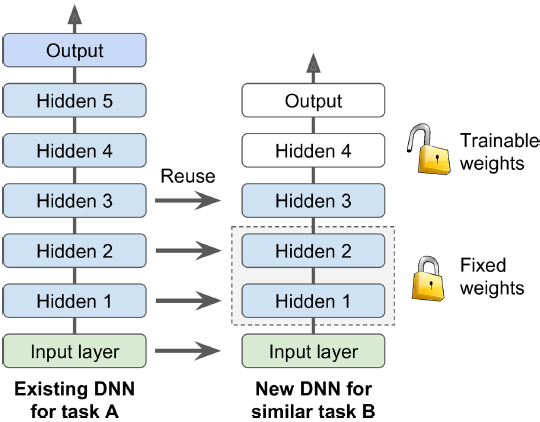

In [64]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [65]:
X_train_A.shape

(43986, 28, 28)

In [66]:
X_train_B.shape

(200, 28, 28)

In [67]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [68]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [69]:
tf.random.set_seed(42)
np.random.seed(42)

In [70]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [71]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [72]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.5926 - accuracy: 0.8102 - val_loss: 0.3895 - val_accuracy: 0.8665
Epoch 2/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3289 - val_accuracy: 0.8827
Epoch 3/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.3170 - accuracy: 0.8895 - val_loss: 0.3015 - val_accuracy: 0.8989
Epoch 4/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.2973 - accuracy: 0.8975 - val_loss: 0.2893 - val_accuracy: 0.9011
Epoch 5/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.2835 - accuracy: 0.9020 - val_loss: 0.2774 - val_accuracy: 0.9063
Epoch 6/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.2729 - accuracy: 0.9062 - val_loss: 0.2734 - val_accuracy: 0.9068
Epoch 7/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.2641 - accuracy: 0.9093 - val_loss: 0.2721 - val_accuracy:

In [73]:
model_A.save("my_model_A.h5")

In [74]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [75]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [76]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 60ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 26ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 26ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 25ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 25ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 24ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 25ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [77]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_224 (Dense)           (None, 300)               235500    
                                                                 
 dense_225 (Dense)           (None, 100)               30100     
                                                                 
 dense_226 (Dense)           (None, 50)                5050      
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 50)                2550      
                                                                 
 dense_229 (Dense)           (None, 1)                

In [78]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [79]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [80]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [81]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 55ms/step - loss: 0.5724 - accuracy: 0.6550 - val_loss: 0.5783 - val_accuracy: 0.6410
Epoch 2/4
7/7 [==============================] - 0s 26ms/step - loss: 0.5365 - accuracy: 0.6750 - val_loss: 0.5414 - val_accuracy: 0.6876
Epoch 3/4
7/7 [==============================] - 0s 25ms/step - loss: 0.5002 - accuracy: 0.7250 - val_loss: 0.5098 - val_accuracy: 0.7150
Epoch 4/4
7/7 [==============================] - 0s 23ms/step - loss: 0.4692 - accuracy: 0.7550 - val_loss: 0.4815 - val_accuracy: 0.7363
Epoch 1/16
7/7 [==============================] - 1s 56ms/step - loss: 0.3921 - accuracy: 0.8200 - val_loss: 0.3445 - val_accuracy: 0.8692
Epoch 2/16
7/7 [==============================] - 0s 26ms/step - loss: 0.2781 - accuracy: 0.9350 - val_loss: 0.2601 - val_accuracy: 0.9270
Epoch 3/16
7/7 [==============================] - 0s 24ms/step - loss: 0.2078 - accuracy: 0.9650 - val_loss: 0.2111 - val_accuracy: 0.9554
Epoch 4/16
7/7 [===============

So, what's the final verdict?

In [82]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [83]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9935


[0.06822815537452698, 0.9934999942779541]

Great! We got quite a bit of transfer: the error rate dropped by a factor of 4.5!

In [84]:
(100 - 97.05) / (100 - 99.35)

4.538461538461503

### Unsupervised Pretraining

* you don’t have much labeled training data
* you cannot find a model trained on a similar task
* it is often cheap to gather unlabeled training examples, but expensive to label them


***solution:***

* If you can gather plenty of unlabeled training data, you can try to use it to train an unsupervised model, such as an autoencoder or a generative adversarial network.
* Then you can reuse the lower layers of the autoencoder or the lower layers of the GAN’s discriminator, add the output layer for your task on top
* Finetune the final network using supervised learning with the expensive labeled training examples

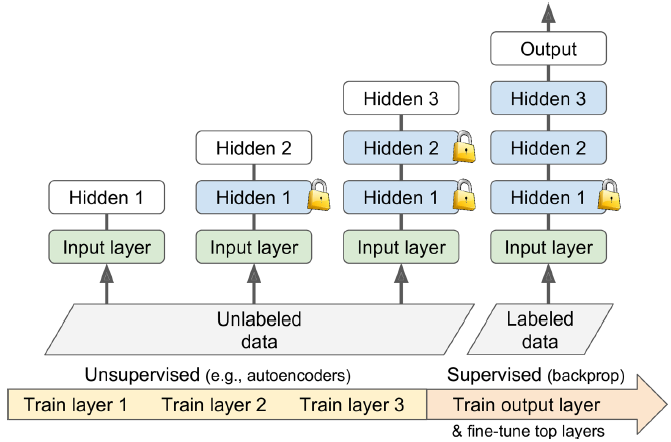

# Faster Optimizers

## Momentum optimization

* it will start out slowly, but it will quickly pick up momentum until it eventually reaches terminal
velocity (if there is some friction or air resistance)


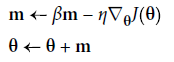

* $η$ is learning rate 

* $β$ is momentum, which must be set between 0 (high friction) and 1 (no friction). A typical momentum value is 0.9

* In contrast, regular Gradient Descent will simply take small, regular steps down the slope



In [85]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

## Nesterov Accelerated Gradient

* measures the gradient of the cost function not at the local position $θ$ but slightly ahead in
the direction of the momentum, at $θ + βm$

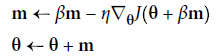

In [86]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

## AdaGrad

* correct its direction earlier to point a bit more toward the global optimum.

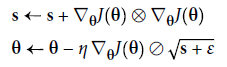

* adaptive learning rate -- this algorithm decays the learning rate, but it does so faster for steep dimensions
than for dimensions with gentler slopes

In [87]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

## RMSProp

* AdaGrad runs the risk of slowing down a bit too fast and never converging to the global optimum. 
* The RMSProp algorithm fixes this by accumulating only the gradients from the most recent iterations
* this optimizer almost always performs much better than AdaGrad

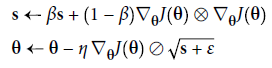

In [88]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

## Adam Optimization

* combines the ideas of momentum
optimization and RMSProp

* just like momentum optimization, it keeps track of an exponentially decaying average of past gradients
* just like RMSProp, it keeps track of an exponentially decaying average of past squared gradients

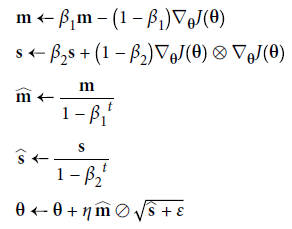

In [89]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Adamax Optimization

In [90]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

In [91]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Learning Rate Scheduling

* If you set it much too high, training may diverge
* If you set it too low, training will take a very long time

***solution: dynamic learning rate***

* start with a large learning rate and then reduce it once training stops making fast progress

### Power Scheduling




* Keras uses `c=1` and `s = 1 / decay`


* The learning rate drops at each step. After s steps, it is down to
η0 / 2. After s more steps, it is down to η0 / 3, then it goes down to η0 / 4, then η0 /
5, and so on

* this schedule first drops quickly, then more and
more slowly.

In [92]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [93]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [94]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4855 - accuracy: 0.8304 - val_loss: 0.4031 - val_accuracy: 0.8596
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3780 - accuracy: 0.8659 - val_loss: 0.3716 - val_accuracy: 0.8728
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3457 - accuracy: 0.8766 - val_loss: 0.3748 - val_accuracy: 0.8734
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3249 - accuracy: 0.8829 - val_loss: 0.3501 - val_accuracy: 0.8794
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3101 - accuracy: 0.8891 - val_loss: 0.3453 - val_accuracy: 0.8782
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2966 - accuracy: 0.8938 - val_loss: 0.3421 - val_accuracy: 0.8818
Epoch 7/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2867 - accuracy: 0.8975 - val_loss: 0.3363 - val_accuracy

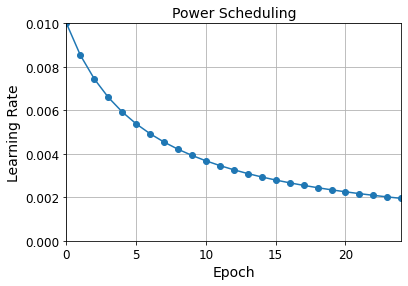

In [95]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling

```lr = lr0 * 0.1**(epoch / s)```

In [96]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [97]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [98]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [99]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8332 - accuracy: 0.7603 - val_loss: 0.8450 - val_accuracy: 0.7080 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 15s 9ms/step - loss: 0.6575 - accuracy: 0.8013 - val_loss: 0.7038 - val_accuracy: 0.8090 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6271 - accuracy: 0.8080 - val_loss: 0.8543 - val_accuracy: 0.7820 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5514 - accuracy: 0.8296 - val_loss: 0.5012 - val_accuracy: 0.8480 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4955 - accuracy: 0.8451 - val_loss: 0.5272 - val_accuracy: 0.8508 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4318 - accuracy: 0.8607 - val_loss: 0.5218 - val_accuracy: 0.8542 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================

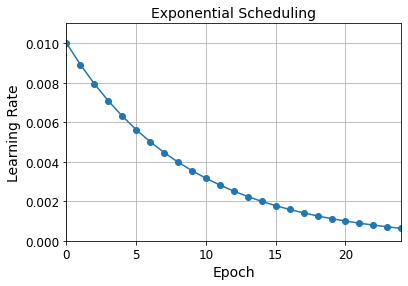

In [100]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

The schedule function can take the current learning rate as a second argument:

In [101]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

### Piecewise Constant Scheduling

In [102]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [103]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [104]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8407 - accuracy: 0.7567 - val_loss: 0.9588 - val_accuracy: 0.7532 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8531 - accuracy: 0.7524 - val_loss: 2.0175 - val_accuracy: 0.7816 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8460 - accuracy: 0.7552 - val_loss: 1.5441 - val_accuracy: 0.5674 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8757 - accuracy: 0.7412 - val_loss: 0.7834 - val_accuracy: 0.7774 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 14s 8ms/step - loss: 1.0357 - accuracy: 0.6839 - val_loss: 0.8529 - val_accuracy: 0.7066 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6258 - accuracy: 0.8083 - val_loss: 0.6254 - val_accuracy: 0.8276 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================

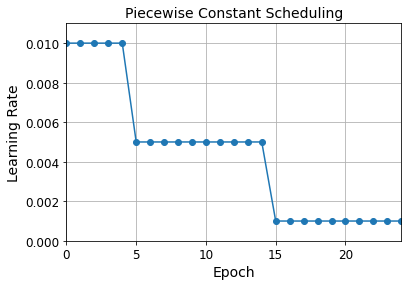

In [105]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

# Avoiding Overfitting Through Regularization

## $\ell_1$ and $\ell_2$ regularization

* use ℓ2 regularization to constrain a neural network’s connection weights
* and/or ℓ1 regularization if you want a sparse model (with many weights equal to 0)


* The L1 regularization penalty is computed as: loss = l1 * reduce_sum(abs(x))

* The L2 regularization penalty is computed as loss = l2 * reduce_sum(square(x))

In [106]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [107]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 17s 9ms/step - loss: 1.6253 - accuracy: 0.8116 - val_loss: 0.7192 - val_accuracy: 0.8300
Epoch 2/2
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7189 - accuracy: 0.8274 - val_loss: 0.6832 - val_accuracy: 0.8364


In [108]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 17s 9ms/step - loss: 1.6192 - accuracy: 0.8112 - val_loss: 0.7174 - val_accuracy: 0.8326
Epoch 2/2
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7200 - accuracy: 0.8269 - val_loss: 0.6815 - val_accuracy: 0.8390


## Dropout

* at every training step, every neuron (including the input neurons, but always excluding the output neurons) has a probability p of being
temporarily “dropped out”

* The hyperparameter
p is called the dropout rate, and it is typically set between 10% and 50%

* After training, neurons don’t get dropped anymore

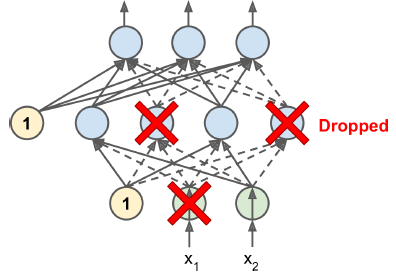


***Why does it work?***

* Neurons have to be as useful as possible on their own. They cannot rely excessively on just a few input neurons; they must pay attention to each of
their input neurons. More robust network.

* The resulting neural network can be seen as an averaging ensemble of a total of $2^N$ possible networks (where N is the total number of droppable neurons)

In [109]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 17s 9ms/step - loss: 0.5676 - accuracy: 0.8032 - val_loss: 0.3677 - val_accuracy: 0.8672
Epoch 2/2
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4190 - accuracy: 0.8456 - val_loss: 0.3482 - val_accuracy: 0.8728


## Monte Carlo (MC) Dropout

* We just make 100 predictions over the test set
* setting training=True to ensure that the Dropout layer is active
* then stack the predictions. Since dropout is active, all the predictions will be different

In [110]:
tf.random.set_seed(42)
np.random.seed(42)

In [111]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [112]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.06, 0.  , 0.92]],
      dtype=float32)

In [113]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.23, 0.  , 0.67]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.14, 0.  , 0.85]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.18, 0.  , 0.76]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.52, 0.  , 0.39]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.23, 0.  , 0.75]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.03, 0.  , 0.94]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.06, 0.  , 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.09, 0.  , 0.82]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.04, 0.  , 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.22, 0.  , 0.76]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.11, 0.  , 0.87]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0

In [114]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.13, 0.  , 0.8 ]],
      dtype=float32)

In [115]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.16, 0.  , 0.18]],
      dtype=float32)

In [116]:
y_pred = np.argmax(y_proba, axis=1)

In [117]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8578

***Alpha Dropout*** 

* a Dropout that keeps mean and variance of inputs to their original values, in order to ensure the self-normalizing property even after this dropout. 
* Alpha Dropout fits well to Scaled Exponential Linear Units by randomly setting activations to the negative saturation value.

In [118]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [119]:
tf.random.set_seed(42)
np.random.seed(42)

In [120]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [121]:
mc_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_247 (Dense)           (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_248 (Dense)           (None, 100)               30100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_249 (Dense)           (None, 10)              

In [122]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [123]:
mc_model.set_weights(model.get_weights())

Now we can use the model with MC Dropout:

In [124]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.06, 0.  , 0.92]],
      dtype=float32)

## Max norm

* for each neuron, it constrains the weights w of the incoming connections such that $∥ w ∥_2 ≤ r$, where r is the max-norm hyperparameter and $∥ · ∥_2$
is the ℓ2 norm

In [125]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [126]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4737 - accuracy: 0.8335 - val_loss: 0.3750 - val_accuracy: 0.8628
Epoch 2/2
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3555 - accuracy: 0.8706 - val_loss: 0.3677 - val_accuracy: 0.8682


## Summary

* apply a good initialization strategy for the connection weights
* use a good activation function
* use Batch Normalization
* reuse parts of a pretrained network
* faster optimizers
* regularization